# Automated Annotation Workflow

This workflow uses the auto_annot tools from besca to newly annotate a scRNAseq dataset based on one or more preannotated datasets. Ideally, these datasets come from a similar tissue and condition.

We use supervised machine learning methods to annotate each individual cell utilizing methods like support vector machines (SVM) or logistic regression.

First, the traning dataset(s) and the testing dataset are loaded from h5ad files or made available as adata objects. Next, the training and testing datasets are corrected using scanorama, and the training datasets are then merged into one anndata object. Then, the classifier is trained utilizing the merged training data. Finally, the classifier is applied to the testing dataset to predict the cell types. If the testing dataset is already annotated (to test the algorithm), a report including confusion matrices can be generated.

In [1]:
import besca as bc

/home/luis/anaconda3/envs/besca-test06/lib/python3.8/site-packages/scanpy/api/__init__.py:3: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  warnings.warn(


In [11]:
import scanpy as sc
import scvelo as scv

### test load datasets with scvelo

Apparently the scv loader makes sure the adata objects are all in comparable format whereas the sc loader loads them as is.

In [12]:
adata_test = scv.read('pbmc3k_processed(1).h5ad')

In [13]:
adata_test_orig  = scv.read('pbmc3k_processed(1).h5ad')

In [14]:
adata_train1 = scv.read('granja_standard_workflow_besca2_0_updated.annotated.h5ad')

In [15]:
adata_train2 = scv.read('kotliarov_processed_citeseq_merged_annotated.h5ad')

Concatenation does not lead to errors when the scv loader is used.

In [16]:
train001 = adata_train1.concatenate(adata_train2)

In [17]:
adata_train_list = [adata_train1, adata_train2]

## Parameter specification

Give your analysis a name.

Specify merge method. Needs to be either scanorama or naive.

In [12]:
merge = 'scanorama' # We recommend to use scanorama here

Decide if you want to use the raw format or highly variable genes. Raw increases computational time and does not necessarily improve predictions.

In [13]:
use_raw = False # We recommend to use False here

You can choose to only consider a subset of genes from a signature set or use all genes.

In [14]:
genes_to_use = 'all' # We suggest to use all here, but the runtime is strongly improved if you select an appropriate gene set

Column names need to be standardised so the function knows which columns to compare.

In [29]:
adata_train_list[0].obs['dataset'] = "test set 1"
adata_train_list[1].obs['dataset'] = "test set 2"

## Correct datasets (e.g. using scanorama) and merge training datasets

In [25]:
import scanorama as scan

This function merges training datasets, removes unwanted genes, and if scanorama is used corrects for datasets.

In [46]:
adata_train, adata_test_corrected = bc.tl.auto_annot.merge_data(adata_train_list, adata_test, genes_to_use = "all", merge = "scanorama")

merging with scanorama
using scanorama rn
Found 207 genes among all datasets
[[0.         0.69557349 0.47404153]
 [0.         0.         0.99201278]
 [0.         0.         0.        ]]
Processing datasets (1, 2)
Processing datasets (0, 1)
Processing datasets (0, 2)
integrating training set


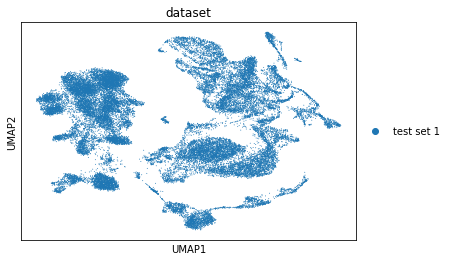

In [60]:
sc.pl.umap(adata_train_list[0], color = "dataset",  ncols = 2, wspace = 0.4, palette = ['#1f77b4'], save= '.scanorama1.svg')

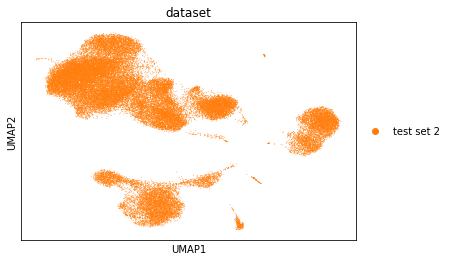

In [61]:
sc.pl.umap(adata_train_list[1], color= "dataset",  ncols = 2, wspace = 0.4, palette = ['#ff7f0e'], save= '.scanorama2.svg')

In [58]:
import matplotlib
matplotlib.rcParams["axes.prop_cycle"]

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


In [54]:
sc.pp.neighbors(adata_train)
sc.tl.umap(adata_train)

         Falling back to preprocessing with `sc.pp.pca` and default params.


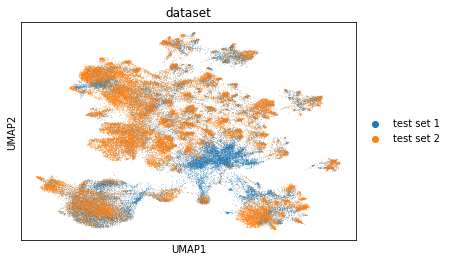

In [63]:
sc.pl.umap(adata_train, color = "dataset", save= '.scanorama_merged.svg')